In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Part 1:

In [2]:
# Load the positions and number of steps for a given pedestrian
def load_postvis(p_id, alpha):
    filename = './outputs/postvis_' +  str(alpha) + '.trajectories'
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        next(reader)
        t = []
        x = []
        y = []
        step = 0
        for row in reader:
            if (int(row[1])==p_id):
                step += 1
                t.append(step)
                x.append(float(row[2]))
                y.append(float(row[3]))
        return t, x , y

# .2: Visualise x and y coordinates of one pedestrian

Text(0, 0.5, 'coordinates')

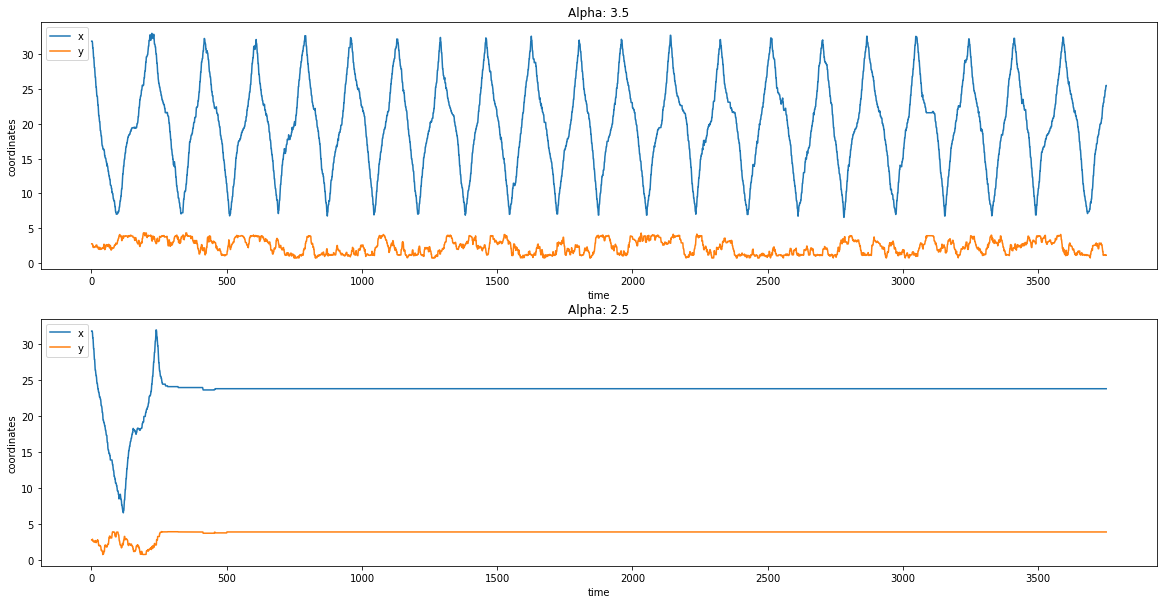

In [3]:
plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(nrows=2, ncols=1)

# Plot for alpha=3.5 for pedestrian with ID=10
t, x , y = load_postvis(10, 3.5)
ax0 = plt.subplot(gs[0, 0])
ax0.plot(t, x)
ax0.plot(t, y)
ax0.legend(['x', 'y'], loc='upper left')
ax0.set_title('Alpha: ' + str(3.5))
plt.xlabel('time')
plt.ylabel('coordinates')

# Plot for alpha=2.5 for pedestrian with ID=10(same pedestrian)
t, x , y = load_postvis(10, 2.5)
ax1 = plt.subplot(gs[1, 0])
ax1.plot(t, x)
ax1.plot(t, y)
ax1.legend(['x', 'y'], loc='upper left')
ax1.set_title('Alpha: ' + str(2.5))
plt.xlabel('time')
plt.ylabel('coordinates')

# Task 5.4: visualize the bifurcation (Andronov-Hopf bifurcation)

In [4]:
def visualize_bifurcation(pd_id, alpha, diff):
    t, x , y = load_postvis(pd_id, alpha)
    timeSteps = len(x)
    x1 = x[diff:]
    x2 = x[:timeSteps-diff]
    plt.figure(figsize=(8,8))
    plt.plot(x2, x1) 
    plt.xlabel('x', fontsize=14)
    plt.ylabel('x_old', fontsize=14)
    plt.title('Alpha: ' + str(alpha), fontsize=18)

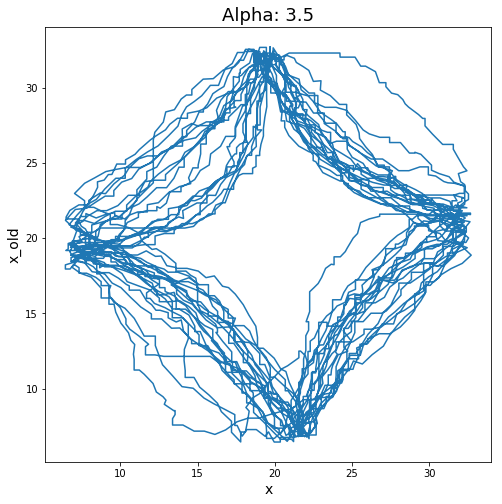

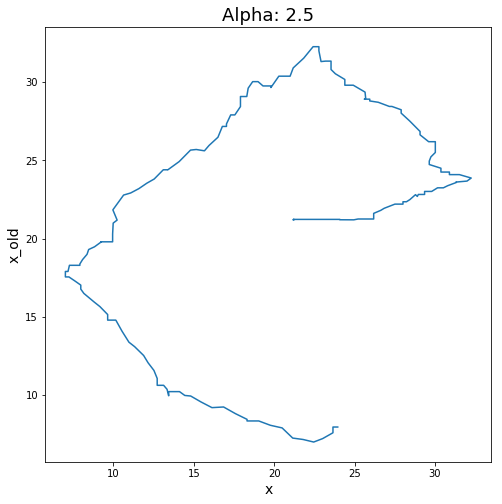

In [5]:
visualize_bifurcation(3,3.5,45)
visualize_bifurcation(3,2.5,45)

## Bifurcation diagram

Text(0, 0.5, "x (pedestrian's coordinate)")

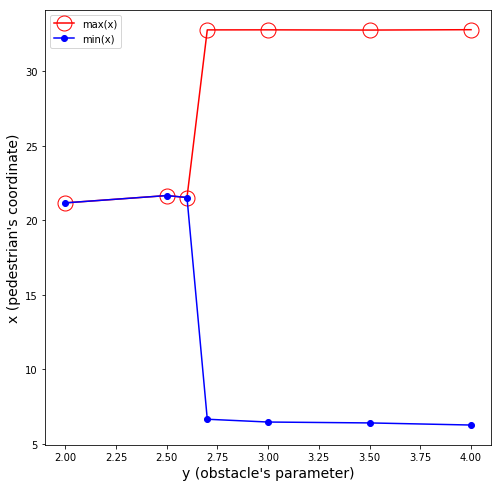

In [6]:
plt.figure(figsize=(8,8))
alphas = [2.0,2.5,2.6,2.7,3.0,3.5,4.0]
maxs= []
mins= []
for alpha in alphas:
    t, x , y = load_postvis(33, alpha)
    timeSteps = len(t)
    x = x[1000:]
    maxs.append(max(x))
    mins.append(min(x))

plt.plot(alphas, maxs, 'ro', linestyle='-', mfc='none', markersize=15) 
plt.plot(alphas, mins, 'bo', linestyle='-') 
plt.legend(['max(x)', 'min(x)'])
plt.xlabel("y (obstacle's parameter)", fontsize=14)
plt.ylabel("x (pedestrian's coordinate)", fontsize=14)

# Part 2:

In [7]:
# Load the positions and number of steps for a given pedestrian
def load_postvis2(p_id, alpha):
    filename = './outputs/postvis_y' +  str(alpha) + '.trajectories'
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        next(reader)
        t = []
        x = []
        y = []
        step = 0
        for row in reader:
            if (int(row[1])==p_id):
                step += 1
                t.append(step)
                x.append(float(row[2]))
                y.append(float(row[3]))
        return t, x , y

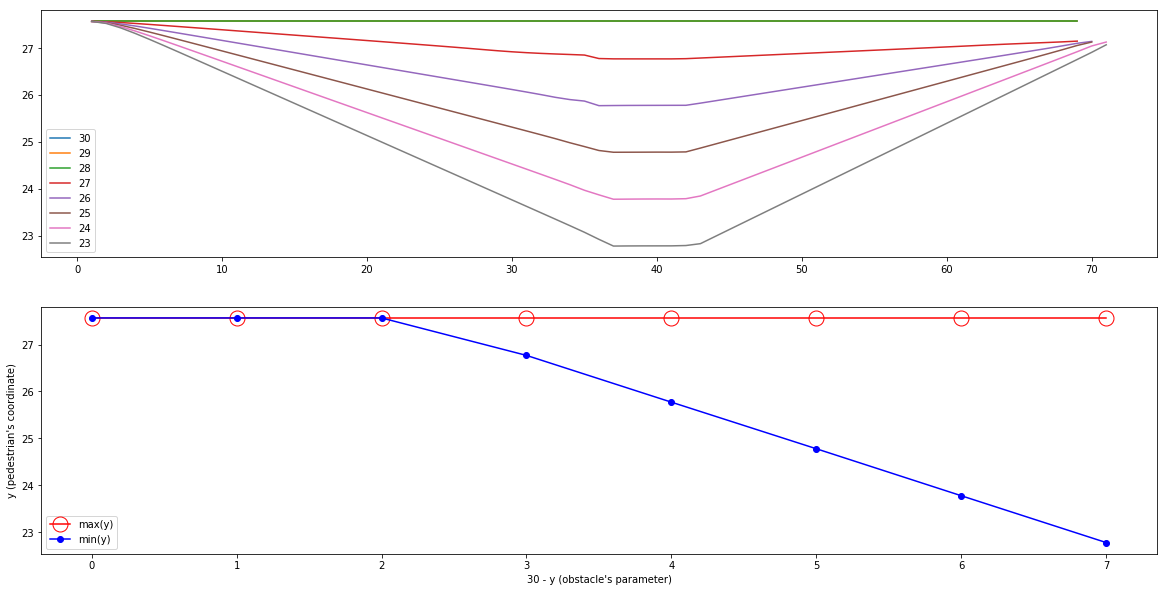

In [8]:
plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(nrows=2, ncols=1)

alphas = []
maxs= []
mins= []
legend = []
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])
for i in range(8):
    t, x , y = load_postvis2(1, 30-i)
    ax0.plot(t, y)
    maxs.append(max(y))
    mins.append(min(y))
    alphas.append(i)
    legend.append(str(30-i))
ax0.legend(legend)
ax1.plot(alphas, maxs, 'ro', linestyle='-', mfc='none', markersize=15) 
ax1.plot(alphas, mins, 'bo', linestyle='-') 
plt.xlabel("30 - y (obstacle's parameter)")
plt.ylabel("y (pedestrian's coordinate)")
plt.legend(['max(y)', 'min(y)'])